# Zadanie projektowe nr 2

## 1. Temat projektu

W tym projekcie zająłem się przetwarzaniem tekstu i analizą opinii z tweetów. Skupiłem się na tweetach w języku polskim, publikowanych w trakcie fazy grupowej piłkarskich mistrzostw EURO 2020, które zawierały jeden z trzech hashtagów: #POLSVK, #ESPPOL, #POLSWE. Dla każdego z hashtagów dokonałem analizy ilości tweetów, ilości tweetów nacechowanych pozytywnie i negatywnie, a także najczęściej występujących słow. Wszystkie te czynności wykonałem oddzielnie dla tweetów opublikowanych przed rozpoczęciem danego meczu i dla tweetów opublikowanych po rozpoczęciu danego meczu. Dodatkowo skomponowałem chmury tagów ze słów zebranch odzdzielnie z tweetów negatywnych i pozytywnych po rozpoczęciu danego meczu.

## 2. Pobieranie danych

Tweety zostały pobrane za pomocą paczki snscrape. Zdecydowałem się na zaimplementowanie prostego skryptu w Pythonie, ponieważ domyślny spobób użycia tej paczki ( przez CLI ) nie pozwalał mi na precyzyjne określenie, jakich tweetów szukam ( tweety w języku polskim, z określonego przedziału czasowego ). Tak zebrane dane zostały następnie zapisane w pliku CSV.

In [1]:
import snscrape.modules.twitter as sntwitter
import csv

maxTweets = 100000

with open('tweets_polswe.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["username", "content", "date", "userlocation", "likecount", "retweetcount", "followers", "url"])
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper(' lang:"pl" since:2021-06-21 until:2021-06-25 #POLSWE').get_items()):
        if i > maxTweets:
            break
        writer.writerow([tweet.username, tweet.content,
                         tweet.date, tweet.user.location,tweet.likeCount,
                         tweet.retweetCount, tweet.user.followersCount, tweet.url])

C:\Users\stokw\AppData\Local\Temp\ipykernel_21956\2705998085.py:12: FutureWarning: username is deprecated, use user.username instead
  writer.writerow([tweet.username, tweet.content,


## 3. Analiza danych

Do analizy słów w języku polskim użyłem paczki SpaCy, która posiada wbudowany moduł umożliwiający lematyzację i tokenyzację słów w języku polskim. Po uporządkowaniu treści tweeta ( usunięciu linków, hashtagów, emoji, niedrukowalnych znaków itp. ) mogłem przejść do jego właściwej analizy. Do analizy sentymentu skorzystałem z gotowego modelu nltk Vader. Model ten działa tylko na zdaniach w języku angielskim, dlatego musiałem przedtem przetłumaczyć treść tweeta. Początkowo chciałem do tego wykorzystać paczke googletrans, jednak po wykonaniu kilkuset połączenie z API było blokowane i nie mogłem przetłumaczyć reszty tweetów. Aby to obejść, musiałem założyć projekt na Google Cloud Platform, dzięki któremu mogłem bez limitu tłumaczyć moje tweety na język angielski. Przetłumaczone tweety były wrzucane do Vadera, a otrzymane wyniki zapisywane w plikach csv do późniejszej analizy. Polską wersję tweeta poddałem tokenizacji i lematyzacji, aby następnie zliczyć częstotliwość występywania danych słów.

### 3.1 Porównanie ilościowe zebranych tweetów 

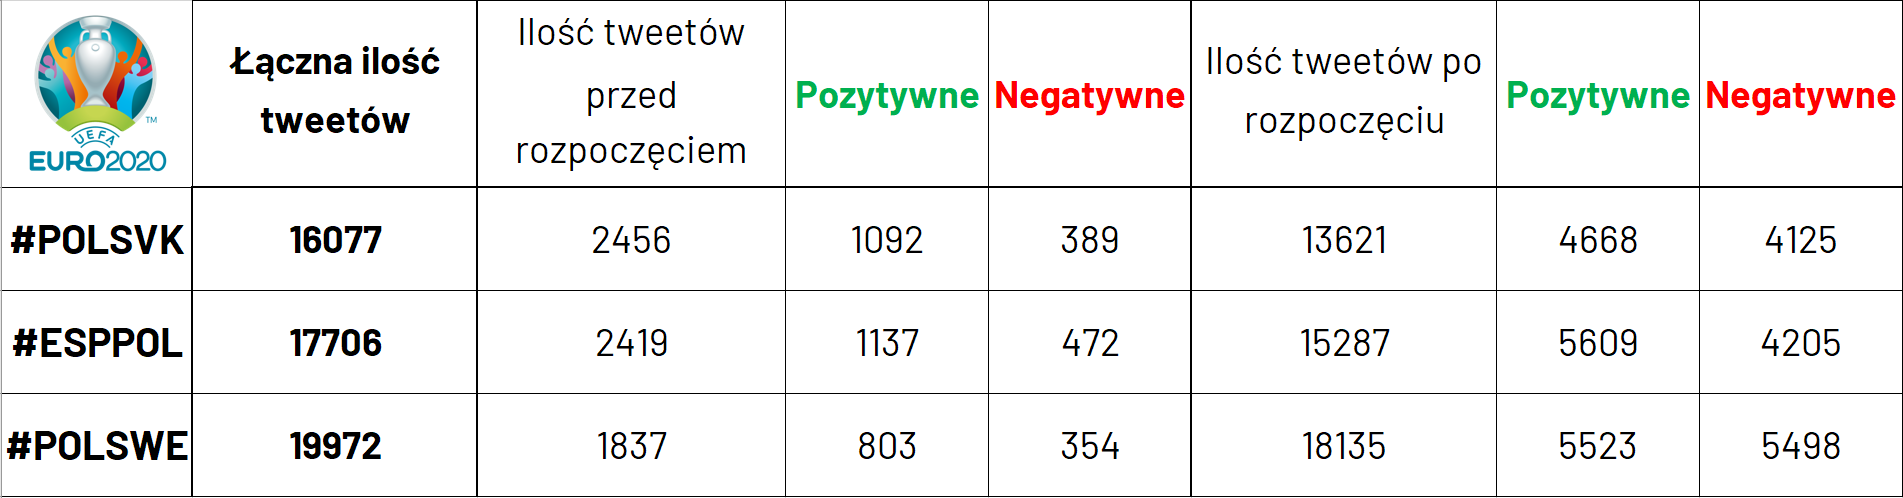



Jak można zauważyć, w każdym rozpatrywanym przypadku większość stanowią tweety neutralne. Ciekawą rzeczą jest to, że pozytywnych tweetów opublikowanych po rozpoczęciu meczu jest zawsze więcej, niż negatywnych. Dla przypomnienia - Polska przegrała mecz ze Słowacją 1:2, zremisowała z Hiszpanią 1:1 i przegrała ze Szwecją 2:3, tym samym odpadając z turnieju. Powodów może być kilka:
- Omyłki w tłumaczeniu mogły przyczynić się do zmiany charakteru wypowiedzi
- Polacy chętniej publikowali tweety w momentach przewagi Polskiej reprezentacji aniżeli w momentach, gdy przegrywała

- Model mógł źle ocenić wypowiedzi o niedosłownym przekazie, np. ironiczne, sarkastyczne

### 3.2 Najczęściej występujące słowa

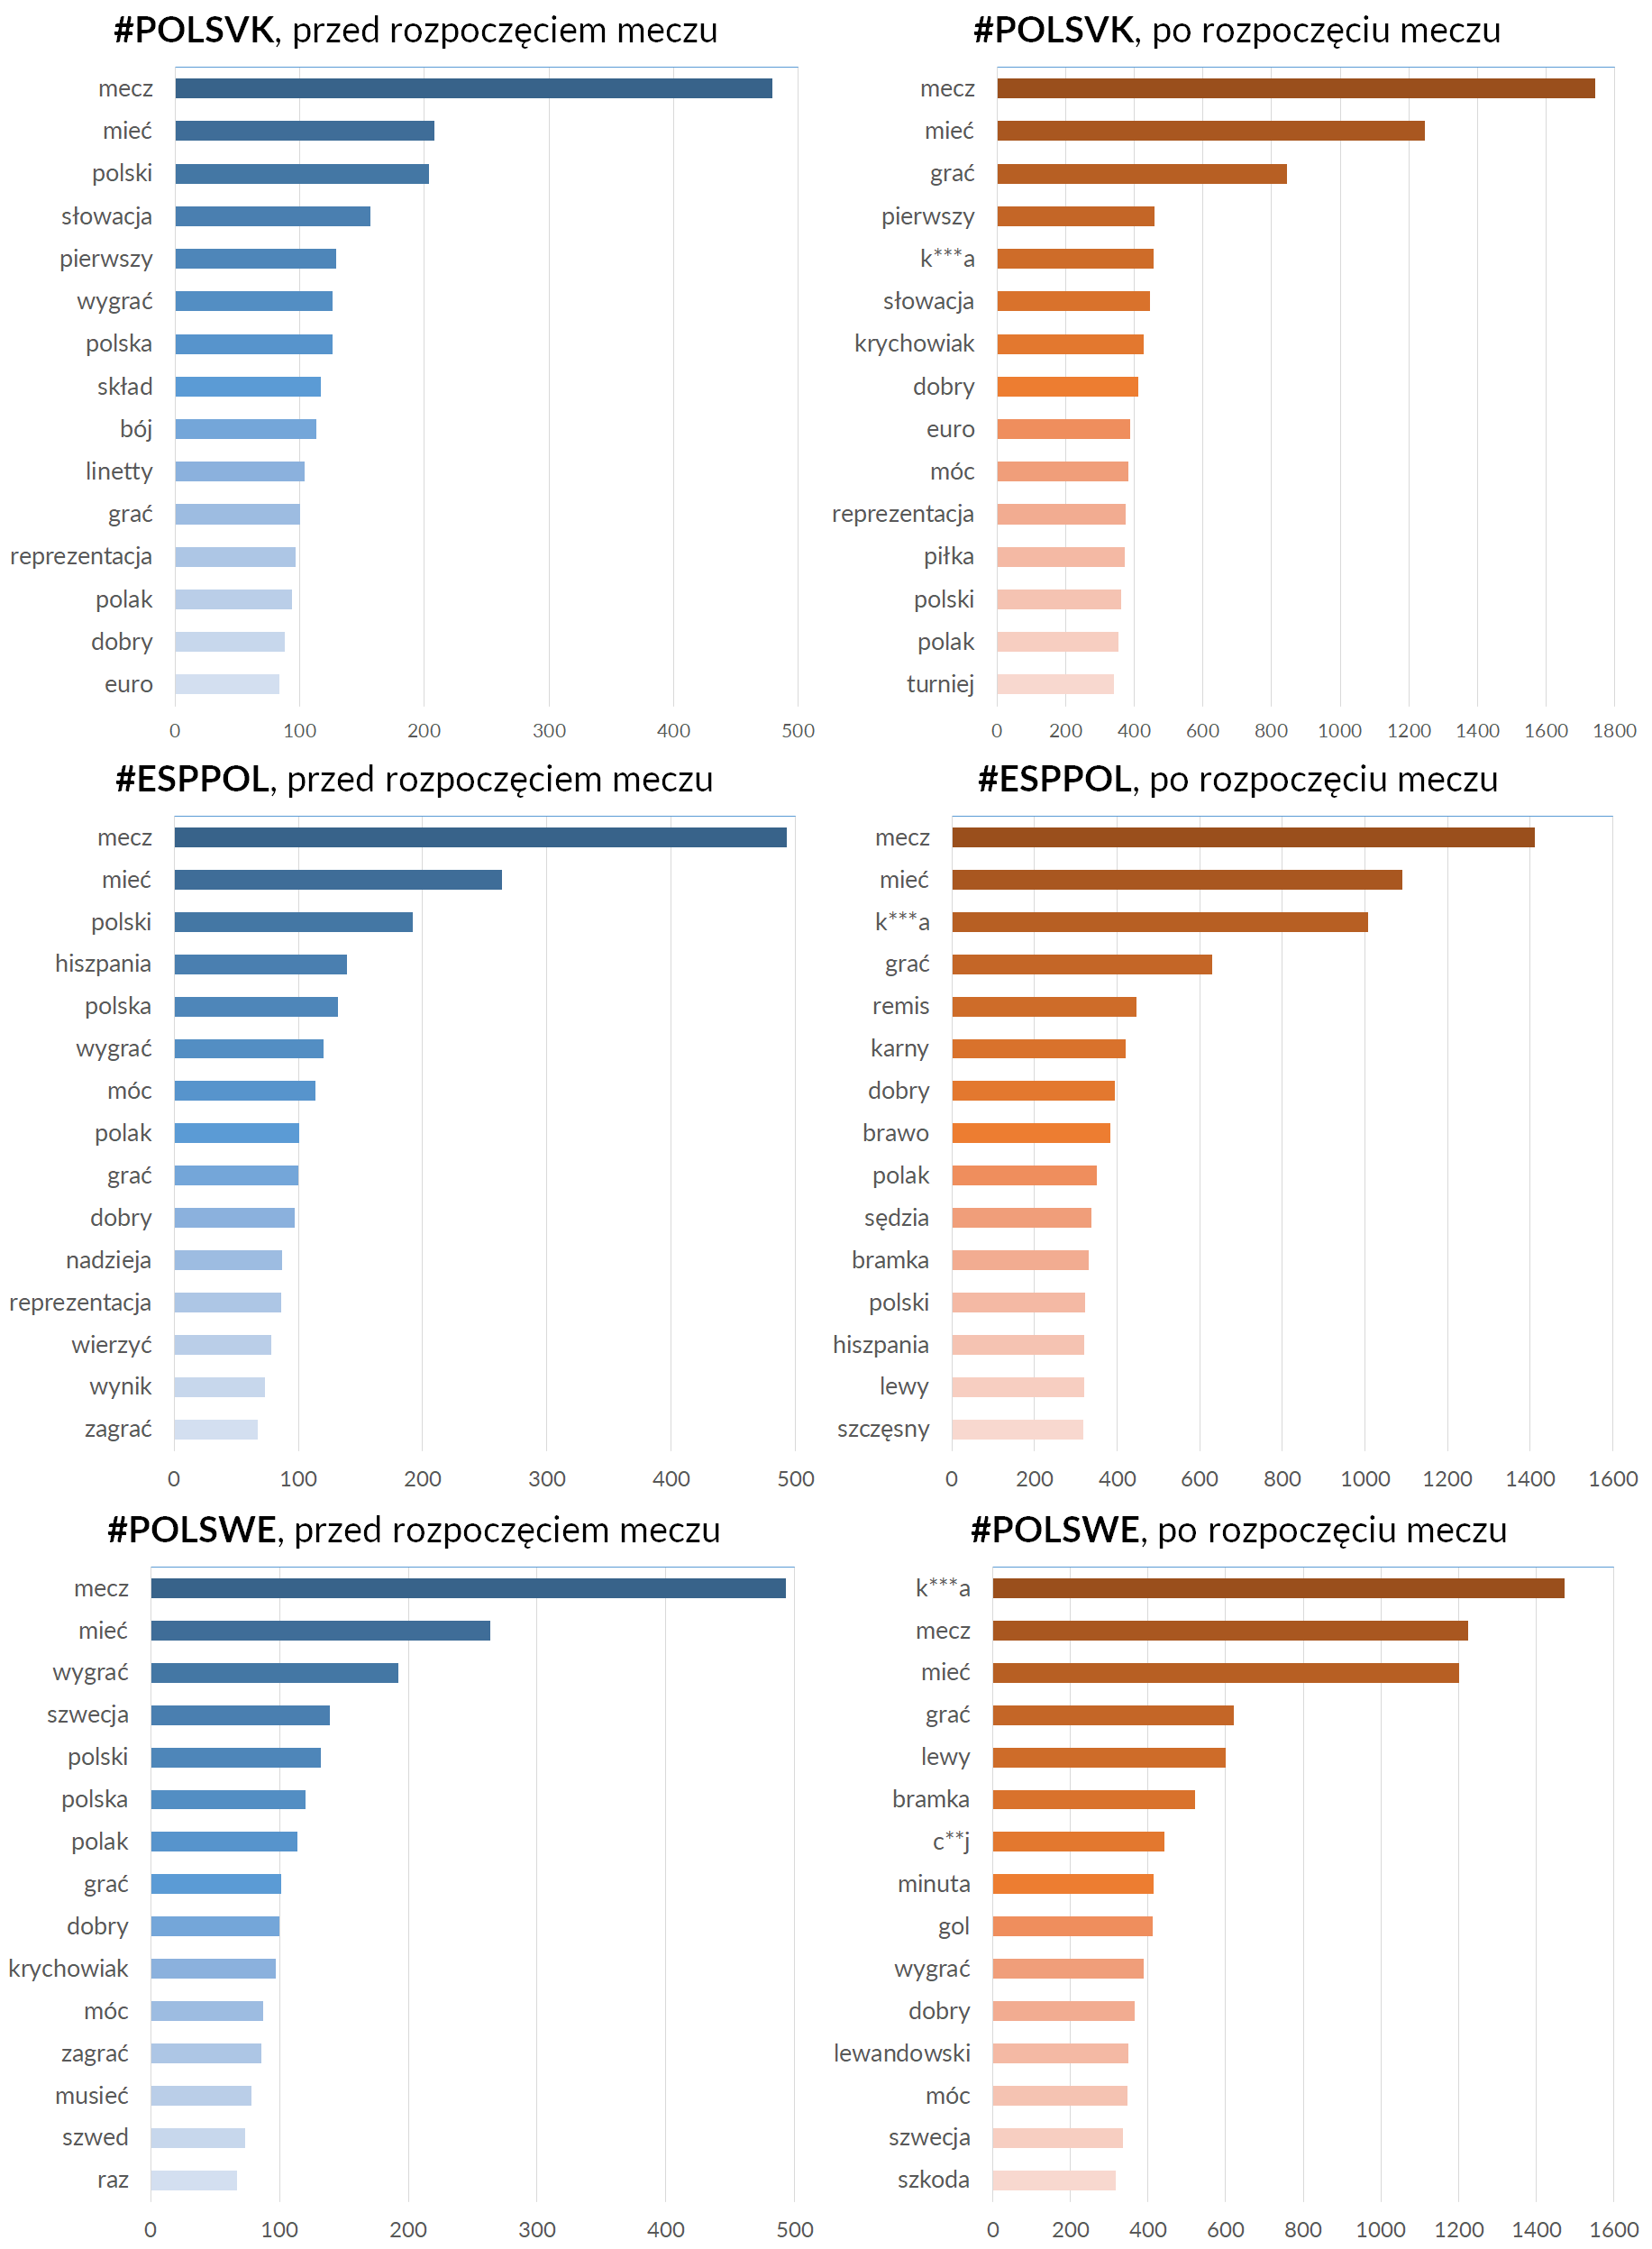

## 3.3 Pozytywne / negatywne chmury tagów

Chmury tagów zostały wygenerowane przy pomocy paczki wordcloud. Wszystkie słowa zostały pobrane z danych po rozpoczęciu danych spotkań. Słowa z pozytywnych tweetów zostały pokolorowane na zielono, a z negatywnych - na czerwono.

### Polska - Słowacja

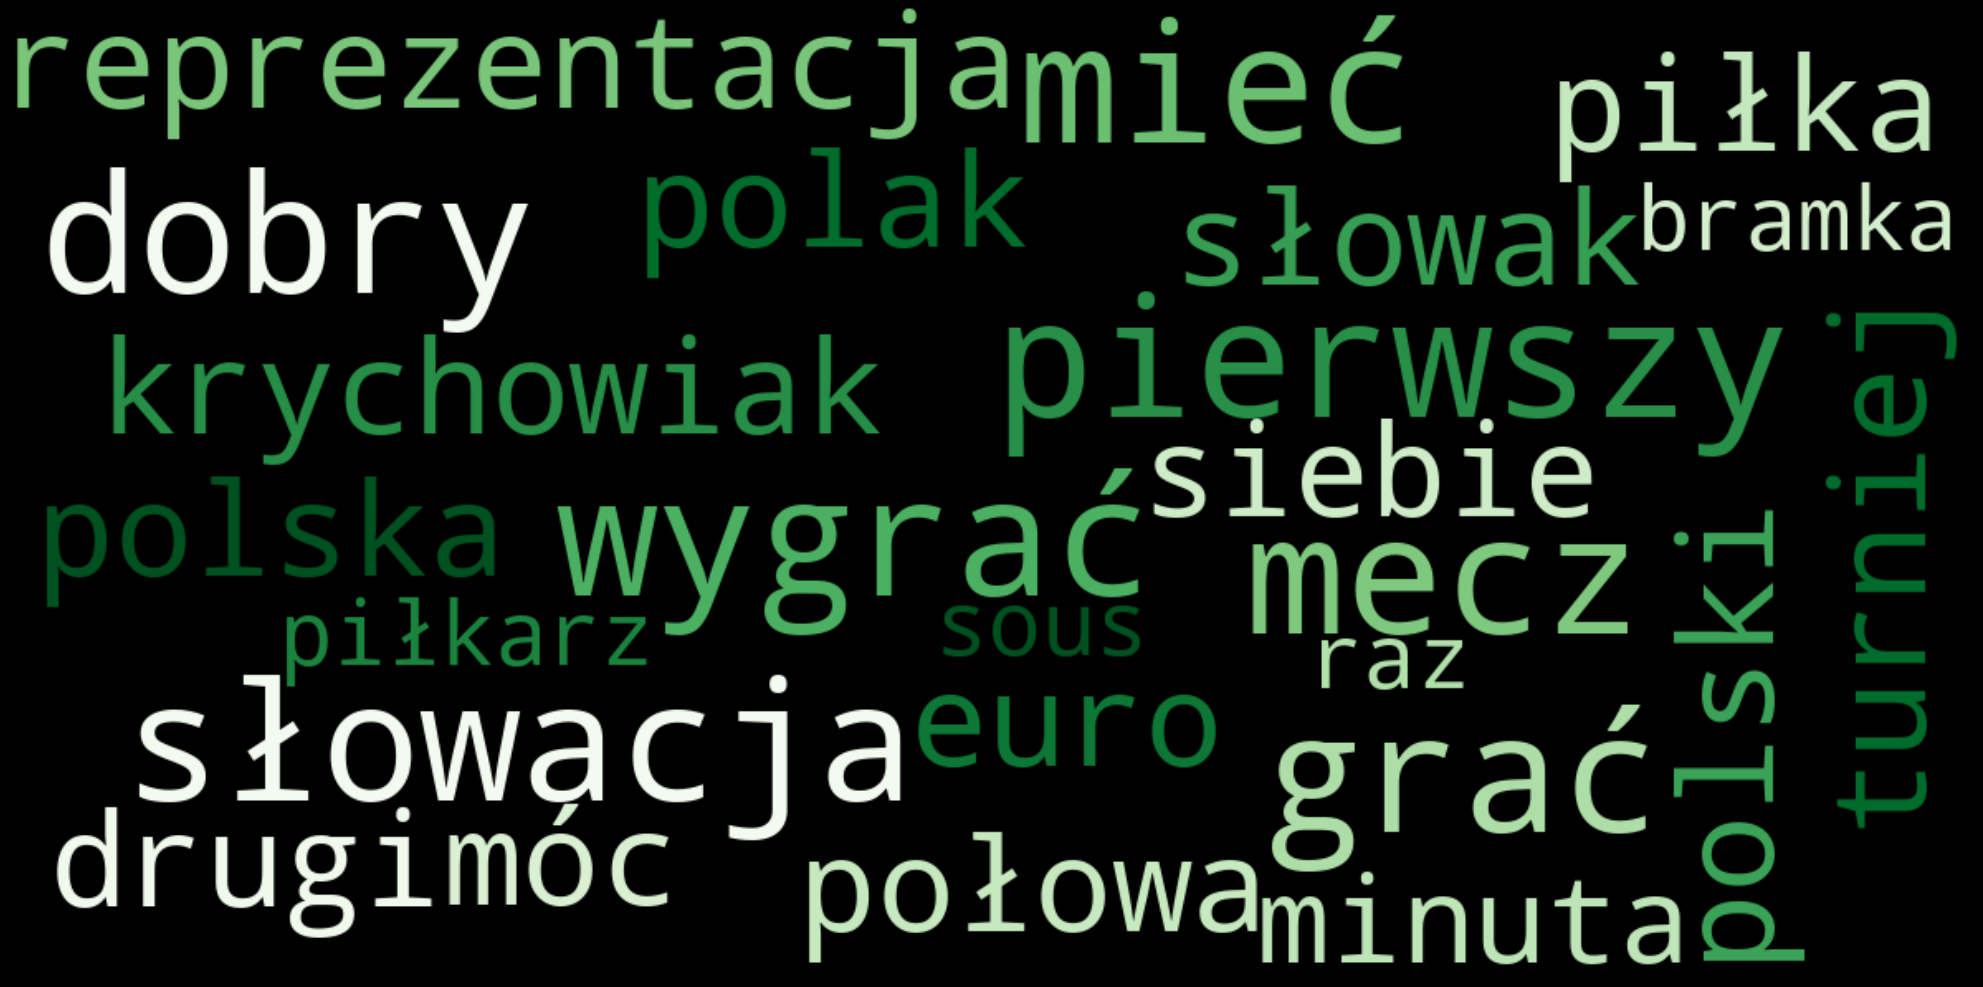


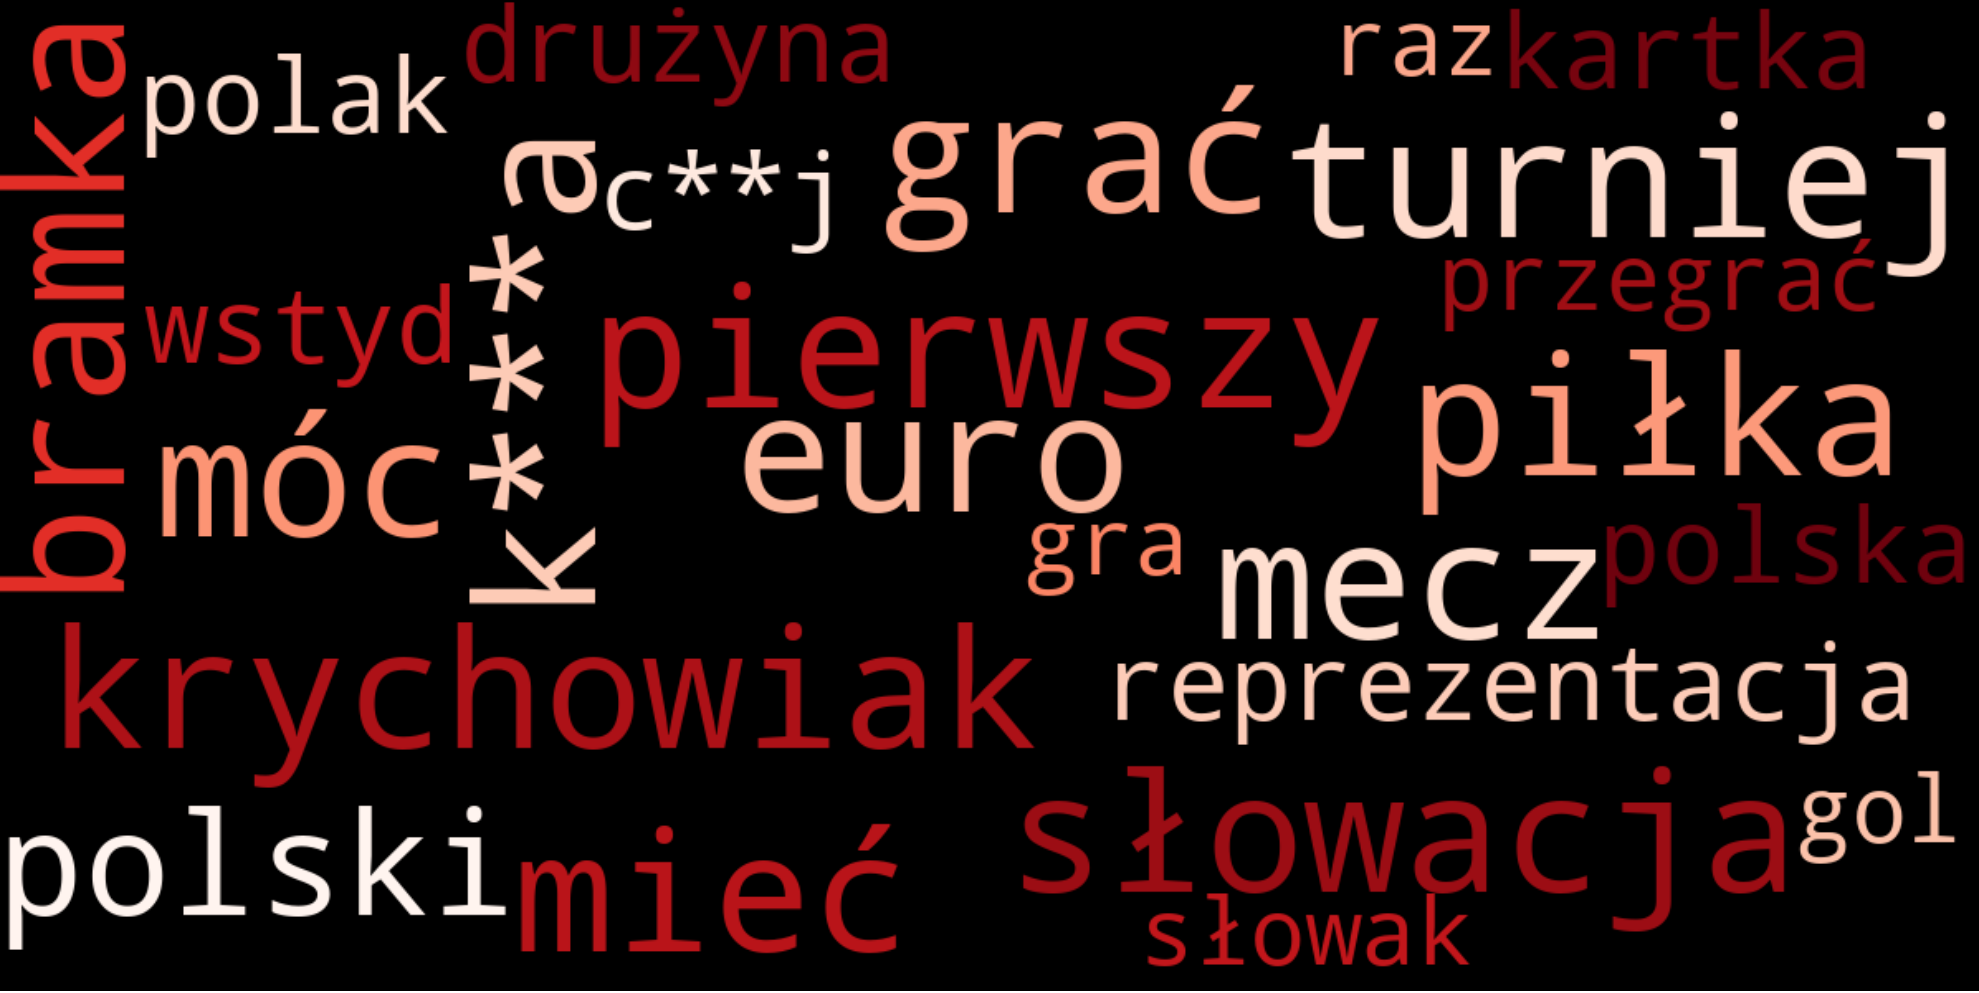

### Polska - Hiszpania

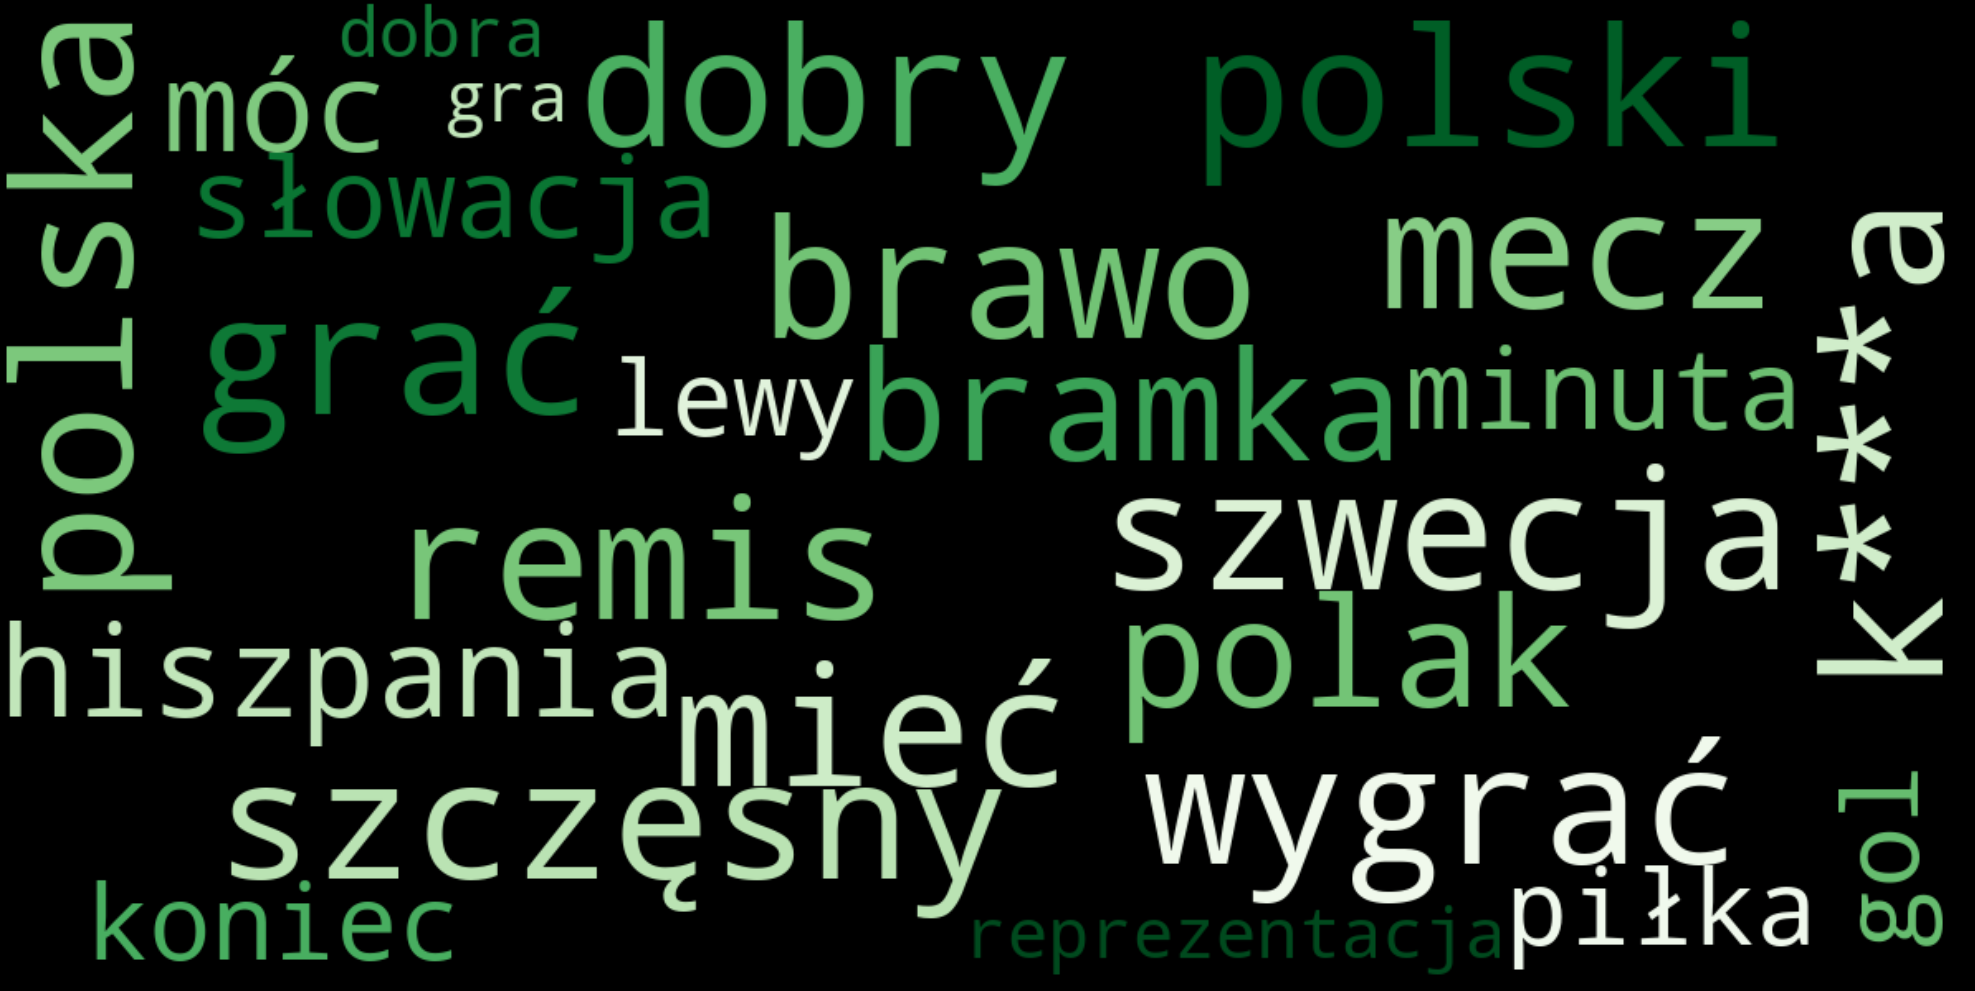

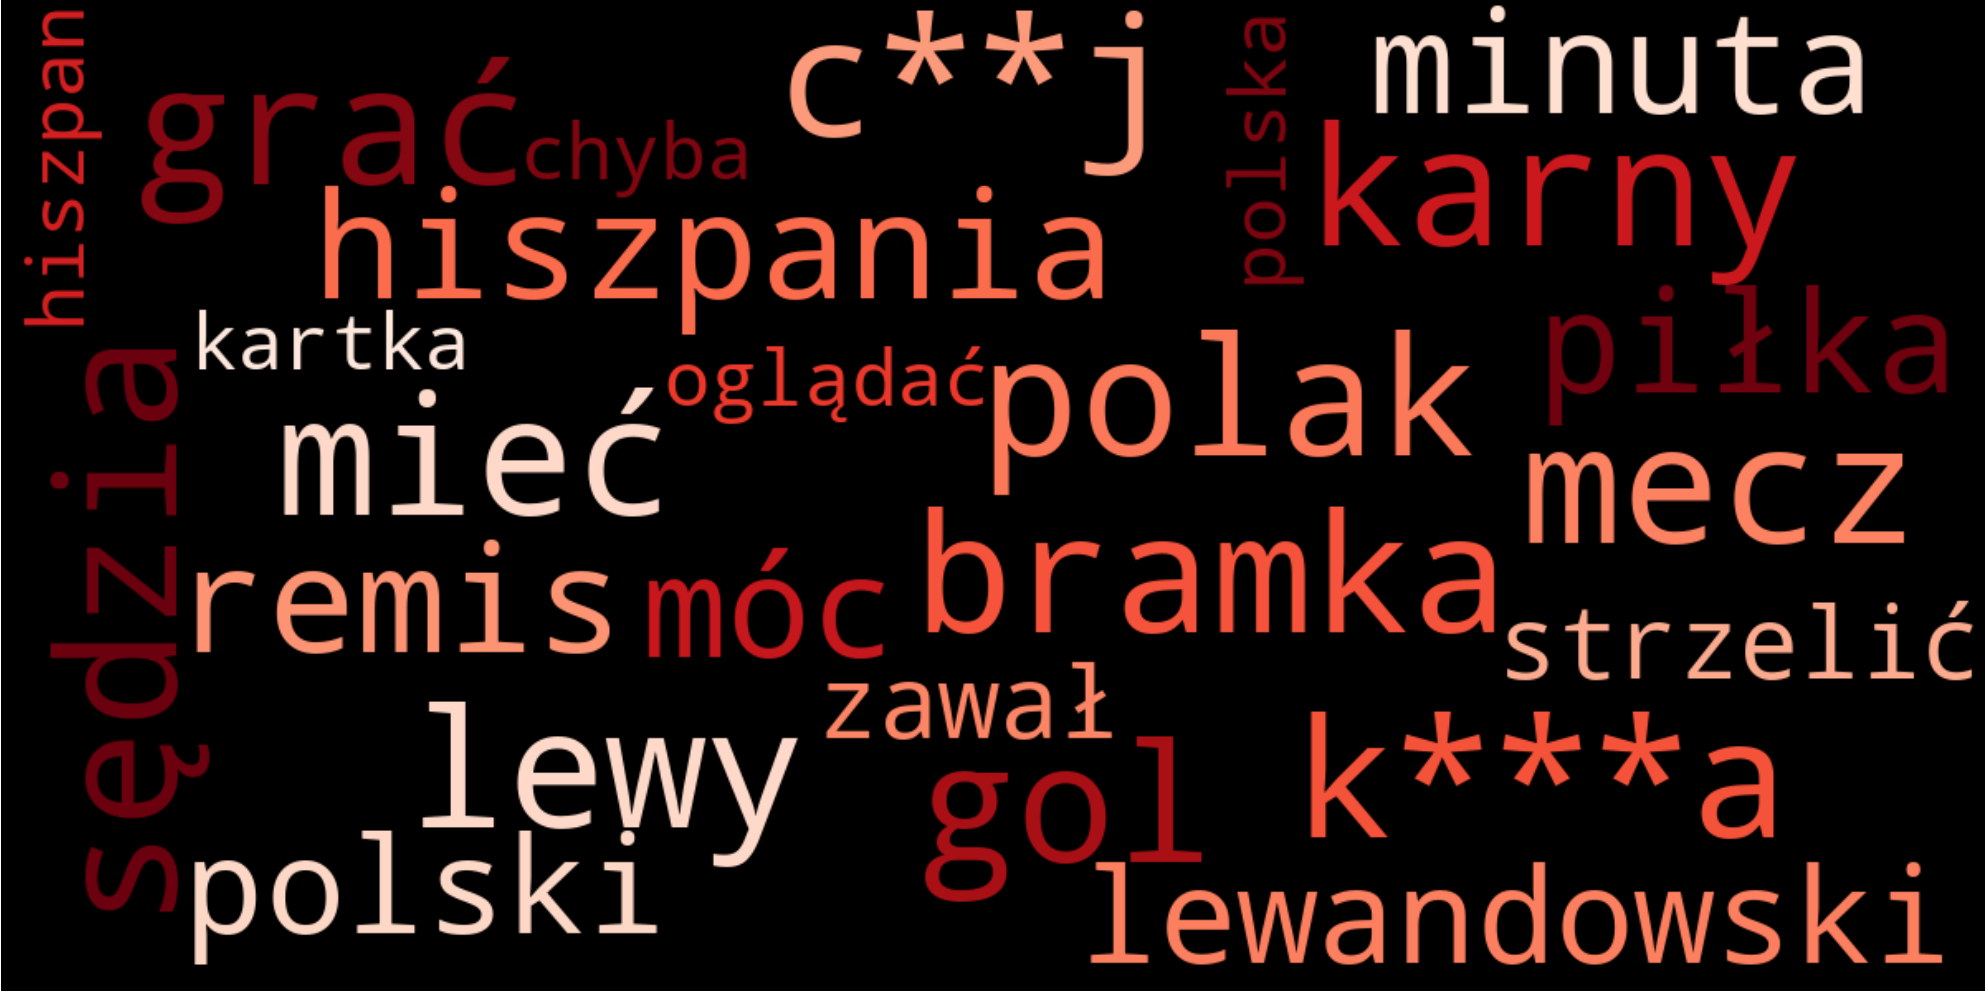

### Polska - Szwecja

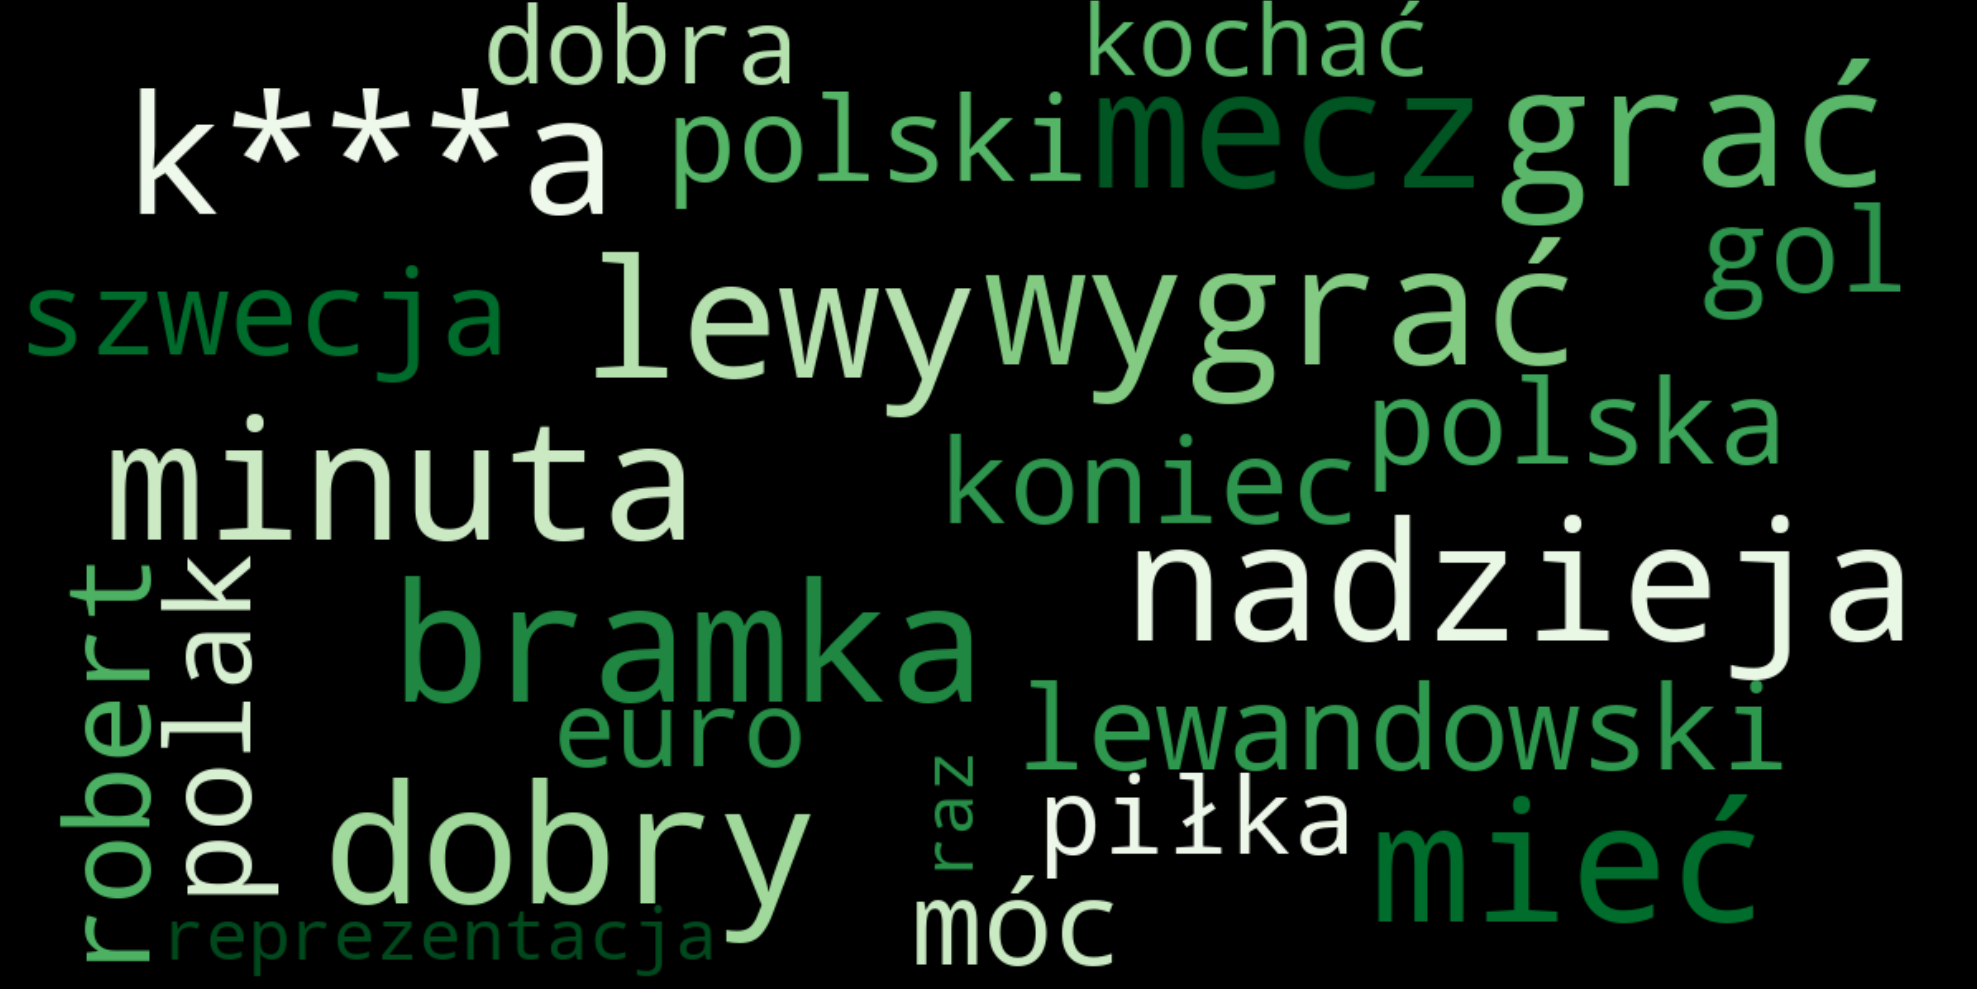

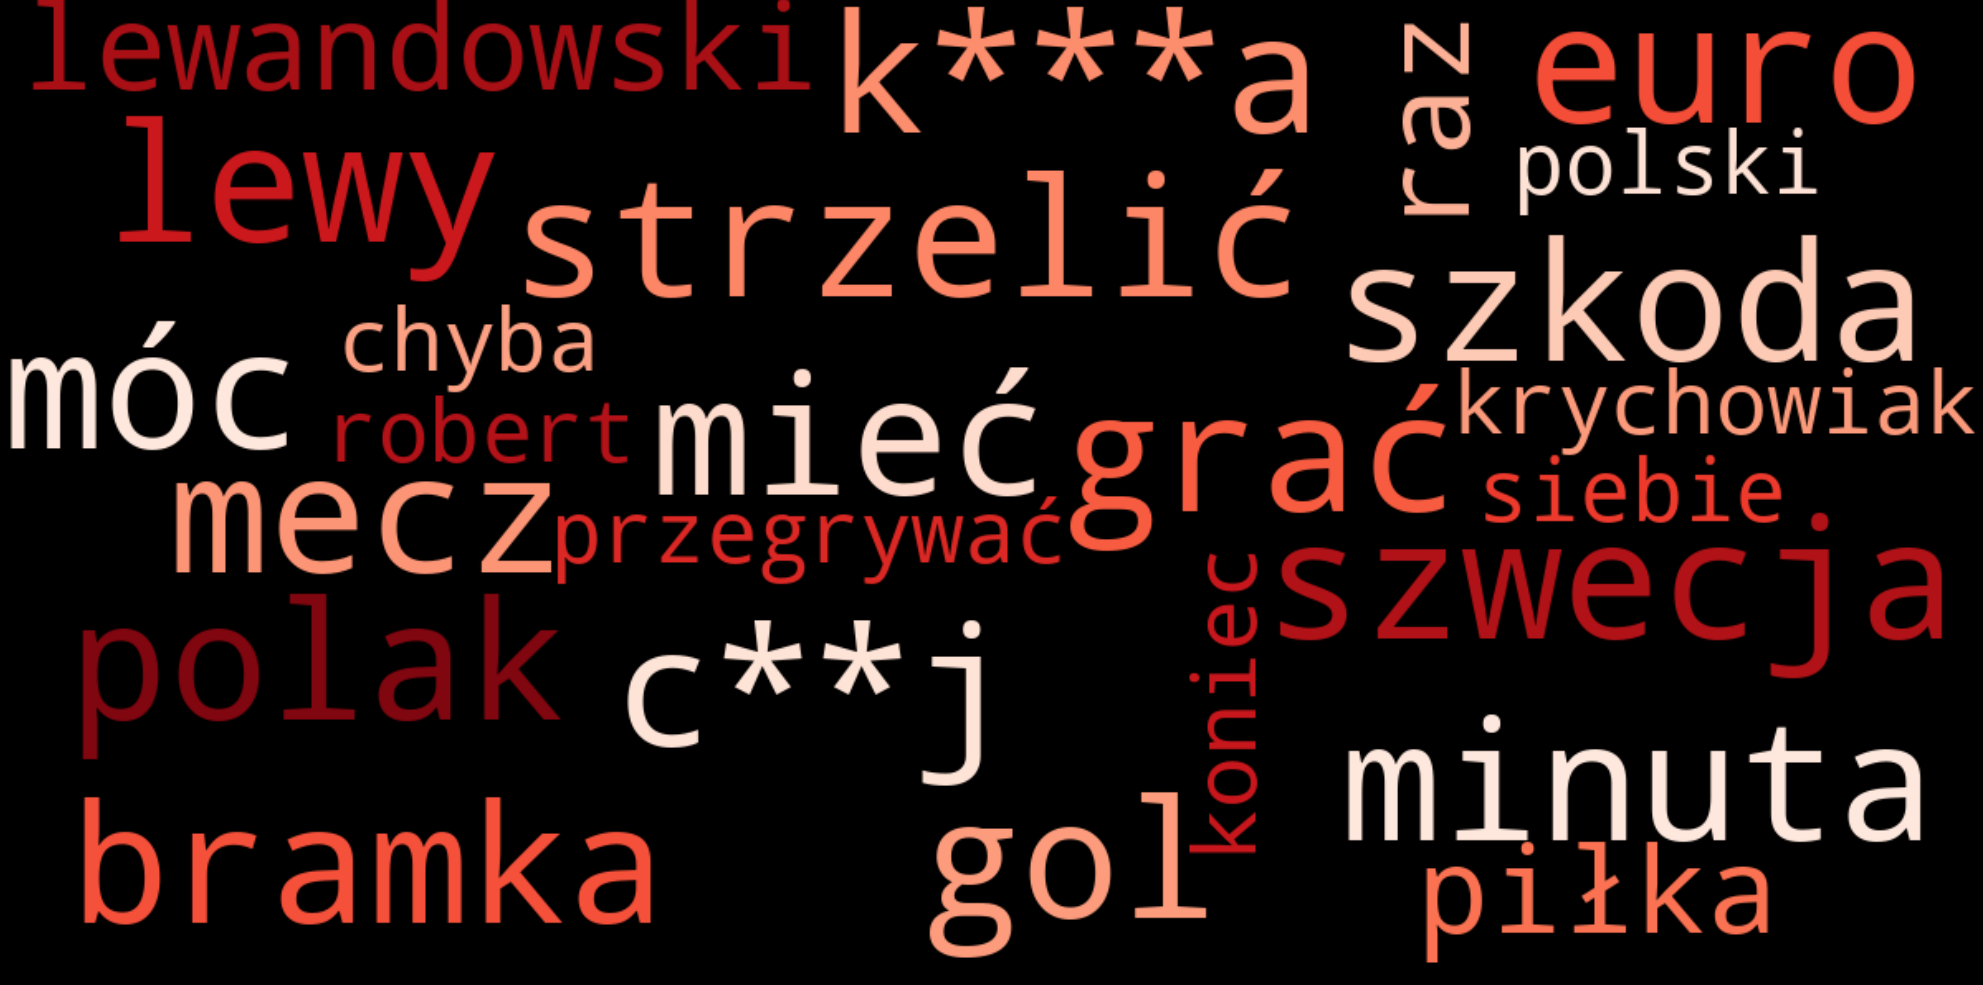